<a href="https://colab.research.google.com/github/HelloKIMMS/2024-intro-DA-code/blob/main/%EA%B2%B0%EA%B3%BC/%EC%82%B0%EB%B6%88_%EB%A9%B4%EC%A0%81%EA%B3%BC_%EA%B0%95%EC%88%98%EB%9F%89%20%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 산불 면적과 강수량의 상관관계

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# 1. 나눔 고딕 설치
!apt-get -qq -y install fonts-nanum

# 2. 런타임에 한글 폰트 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import numpy as np
import os

# 3. 설치된 나눔고딕 확인 및 적용
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    plt.rc('font', family='NanumGothic')
    plt.rcParams['axes.unicode_minus'] = False
    print("✅ 한글 폰트 NanumGothic 적용 완료!")
else:
    print("❌ 폰트 파일이 존재하지 않습니다. 런타임 다시 시작 후 재시도하세요.")

✅ 한글 폰트 NanumGothic 적용 완료!


In [ ]:
df = pd.read_excel('산불통계자료.xlsx', sheet_name=0)
df.columns = ['지역', '연도', '산불건수', '산불면적', '강수량']
df['산불면적'] = pd.to_numeric(df['산불면적'], errors='coerce')
df['강수량'] = pd.to_numeric(df['강수량'], errors='coerce')
df['연도'] = df['연도'].astype(int)

## 1. 산불 면적 vs 강수량 산점도

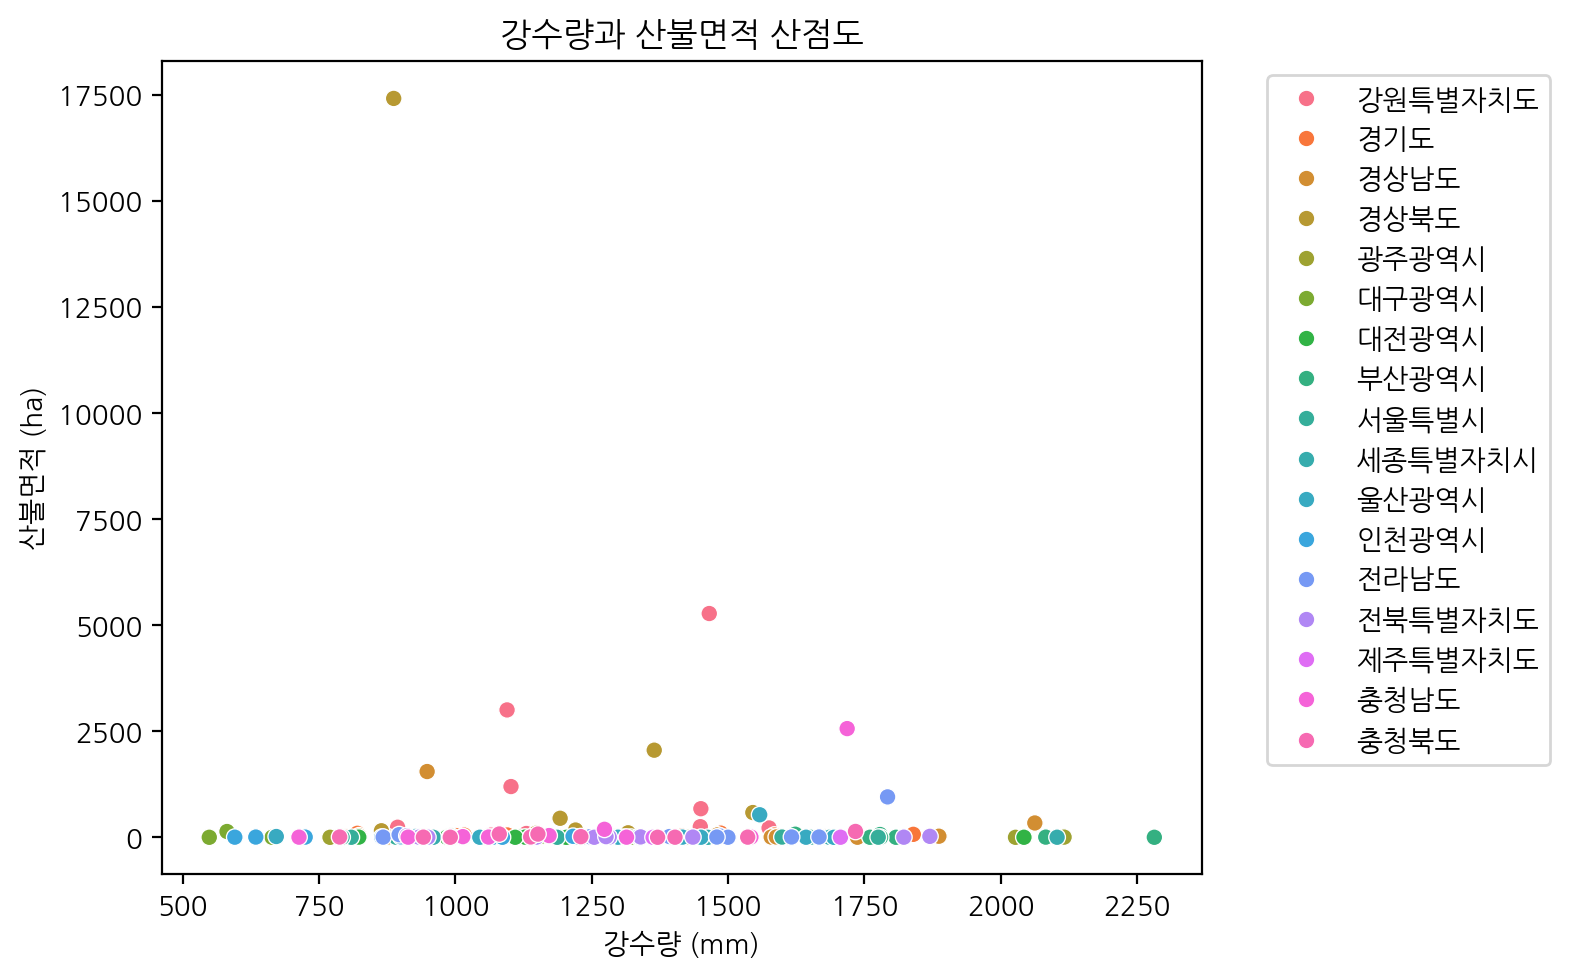

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='강수량', y='산불면적', hue='지역')
plt.title("강수량과 산불면적 산점도")
plt.xlabel("강수량 (mm)")
plt.ylabel("산불면적 (ha)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 2. 지역별 평균 산불 면적 막대그래프

<ipython-input-63-36361dc79637>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='지역', y='산불면적', estimator='mean', ci=None)


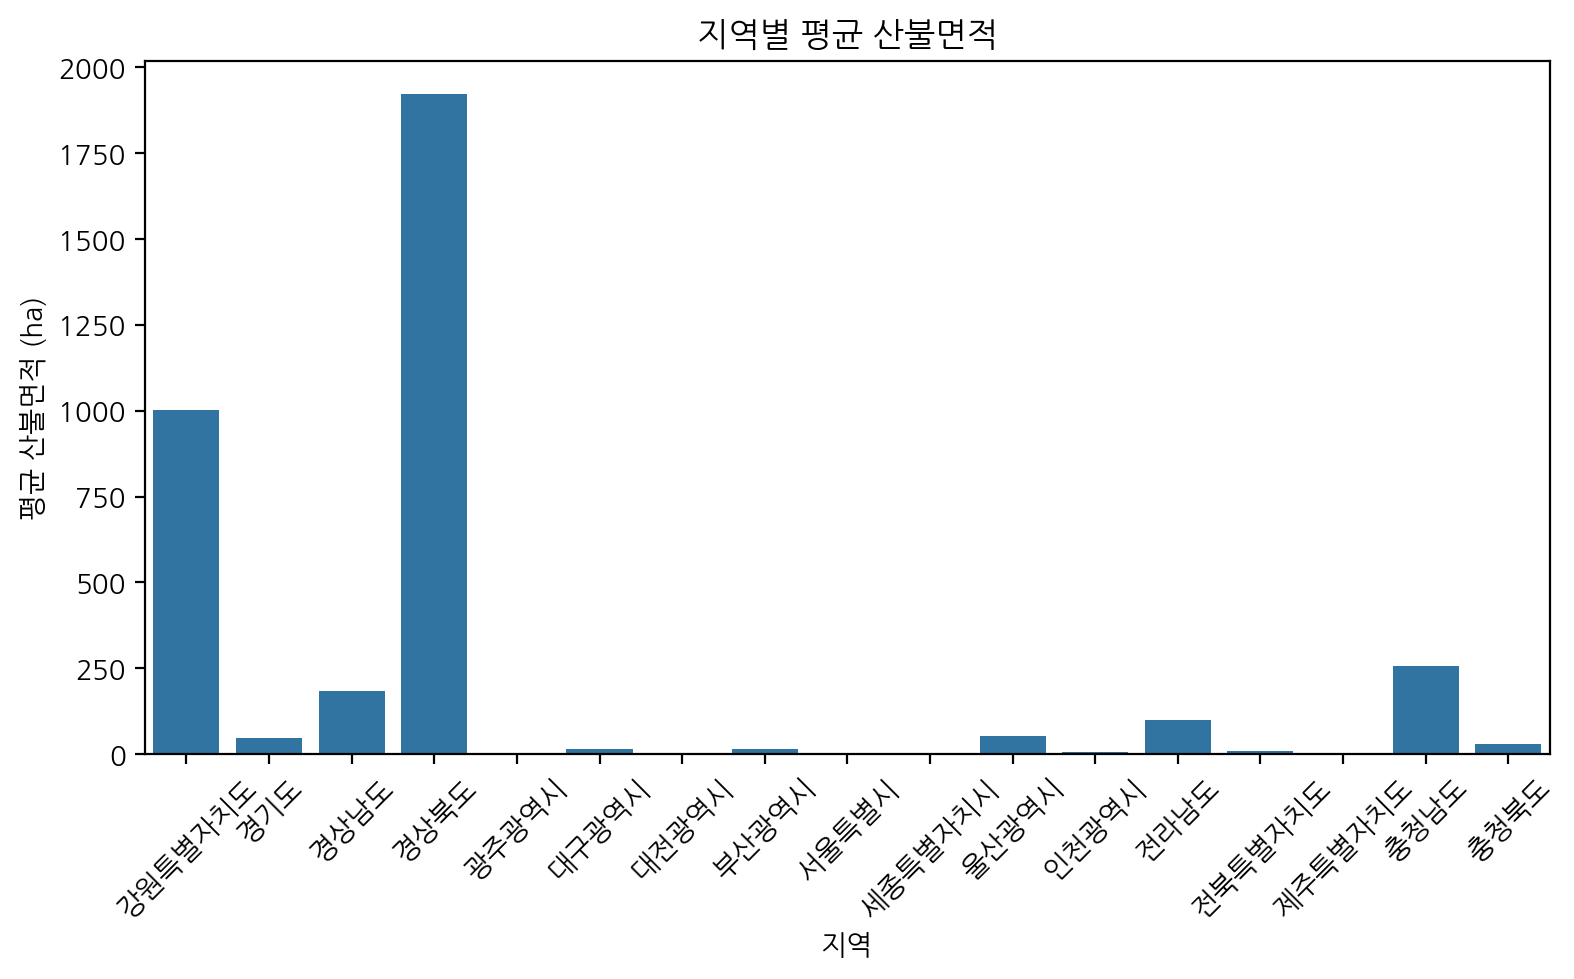

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='지역', y='산불면적', estimator='mean', ci=None)
plt.title("지역별 평균 산불면적")
plt.ylabel("평균 산불면적 (ha)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. 연도별 평균 산불 면적/강수량 라인그래프

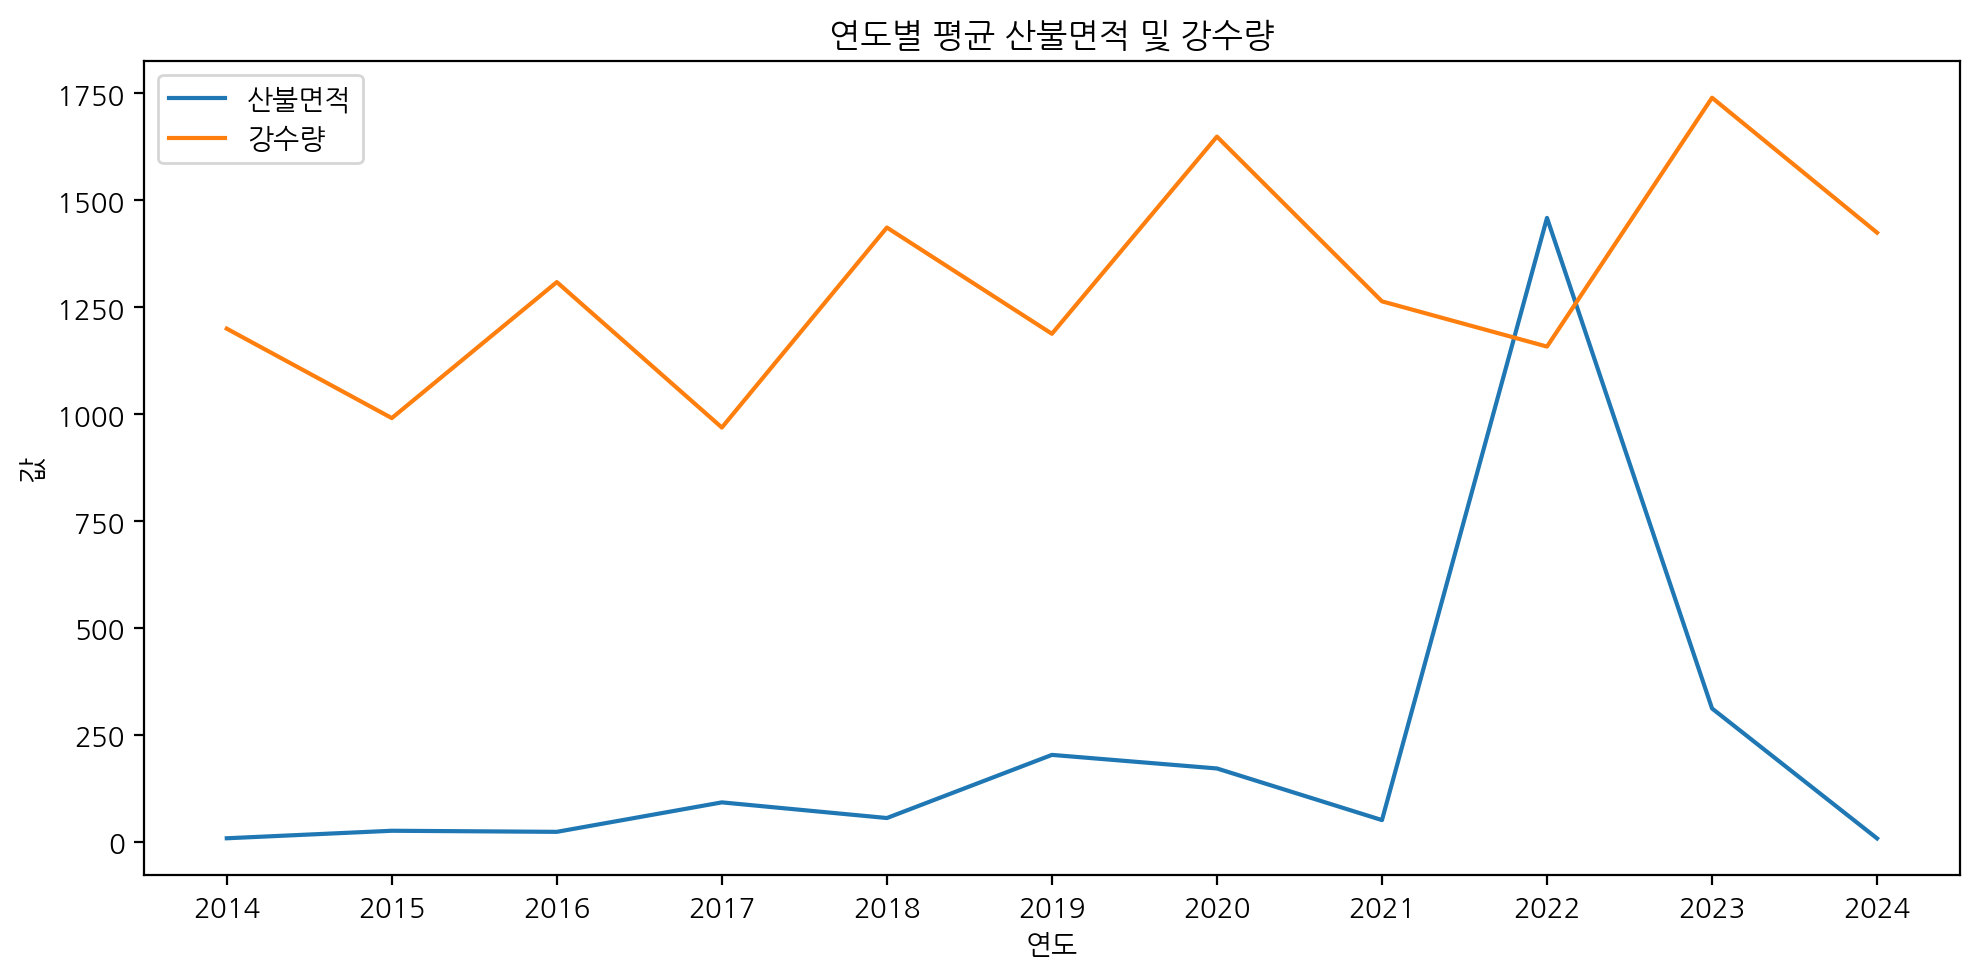

In [ ]:
plt.figure(figsize=(10, 5))
df_grouped = df.groupby('연도')[['산불면적', '강수량']].mean().reset_index()
sns.lineplot(data=df_grouped, x='연도', y='산불면적', label='산불면적')
sns.lineplot(data=df_grouped, x='연도', y='강수량', label='강수량')
plt.title("연도별 평균 산불면적 및 강수량")
plt.ylabel("값")
plt.xticks(df_grouped['연도'])
plt.tight_layout()
plt.show()

## 4. 박스플롯 - 지역별 산불 면적

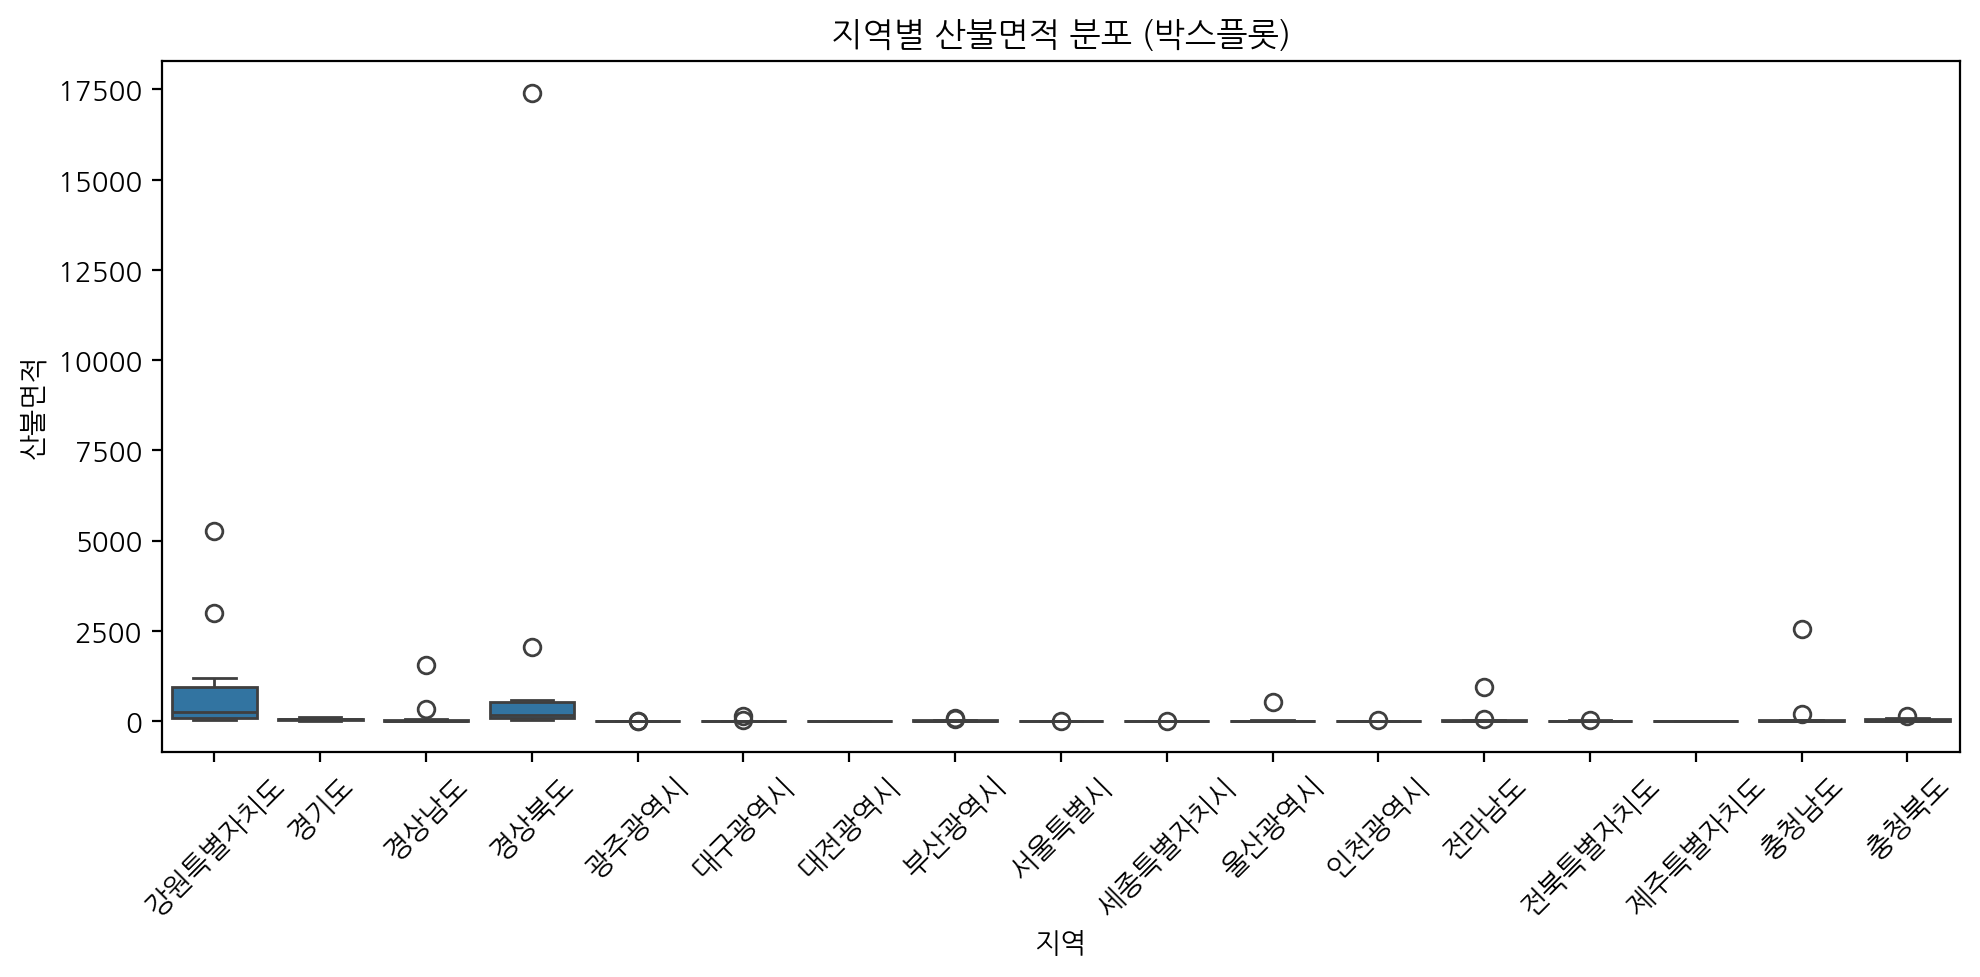

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='지역', y='산불면적')
plt.title("지역별 산불면적 분포 (박스플롯)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. 산불면적 / 강수량 비율 히스토그램

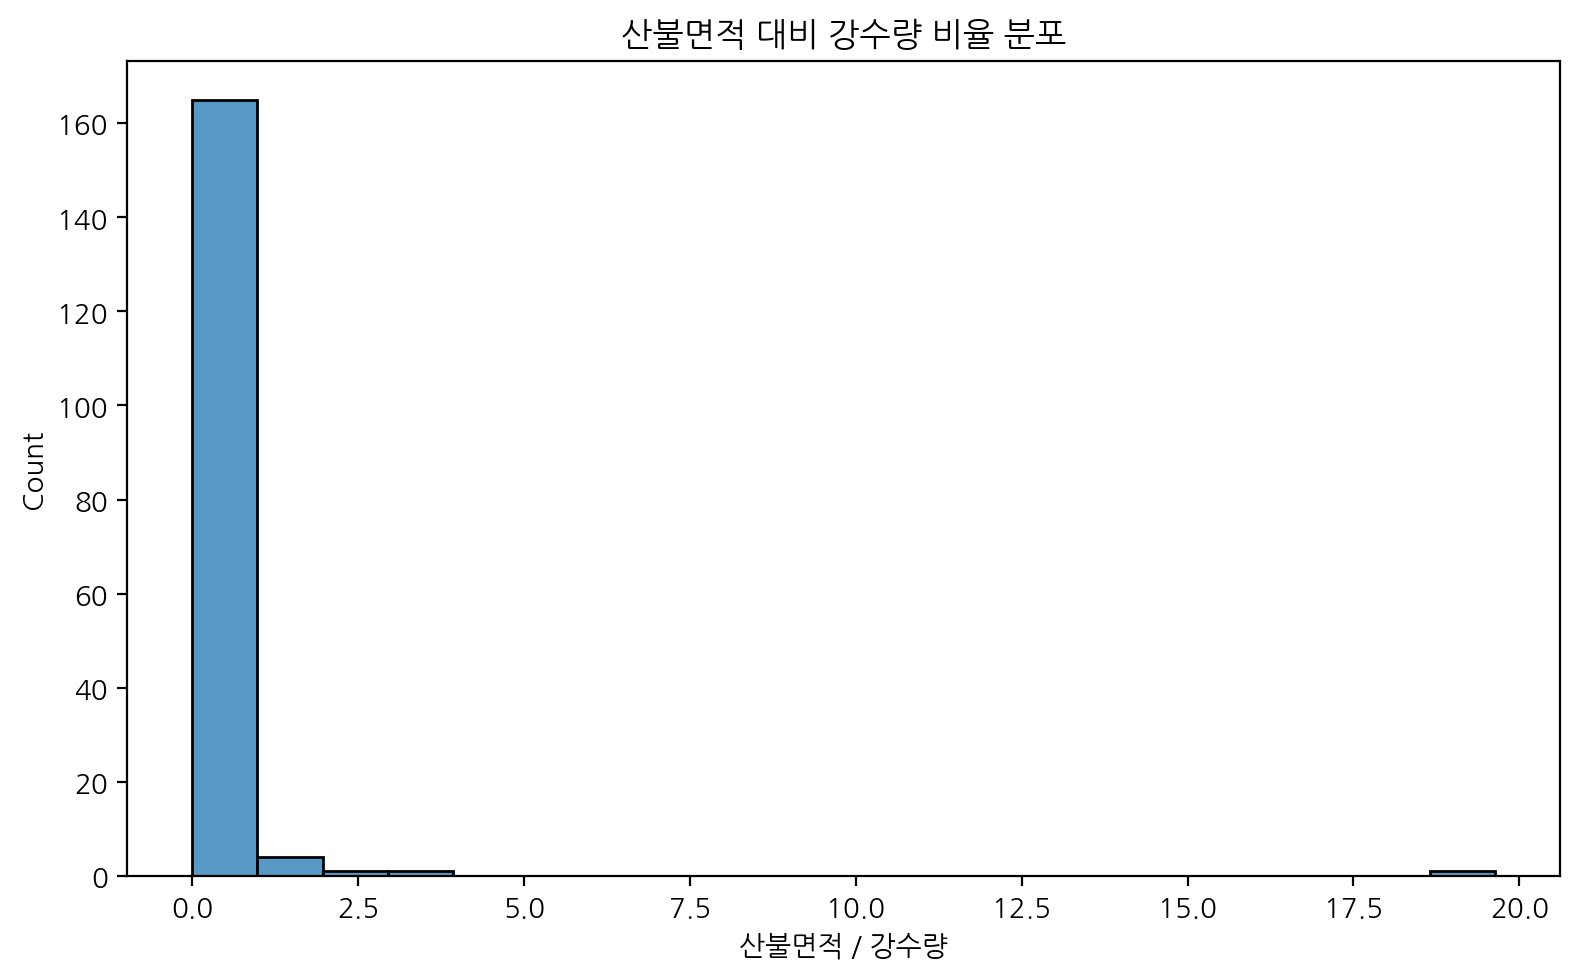

In [ ]:
df['면적당강수'] = df['산불면적'] / df['강수량']
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='면적당강수', bins=20)
plt.title("산불면적 대비 강수량 비율 분포")
plt.xlabel("산불면적 / 강수량")
plt.tight_layout()
plt.show()

## 강수량과 산불 발생 빈도 간에 음의 상관관계가 큰 지역

In [79]:
# 지역별 상관계수 계산
corr_list = []

for 지역 in df['지역'].unique():
    sub_df = df[df['지역'] == 지역]
    if len(sub_df) >= 3:  # 데이터가 3개 이상일 때만 계산
        corr = sub_df['강수량'].corr(sub_df['산불면적'])
        corr_list.append({'지역': 지역, '상관계수': corr})

corr_df = pd.DataFrame(corr_list)

In [80]:
# 음의 상관관계 기준 정렬
corr_df_sorted = corr_df.sort_values('상관계수')

<ipython-input-81-a0b535625357>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=corr_df_sorted, x='상관계수', y='지역', palette='coolwarm', orient='h')


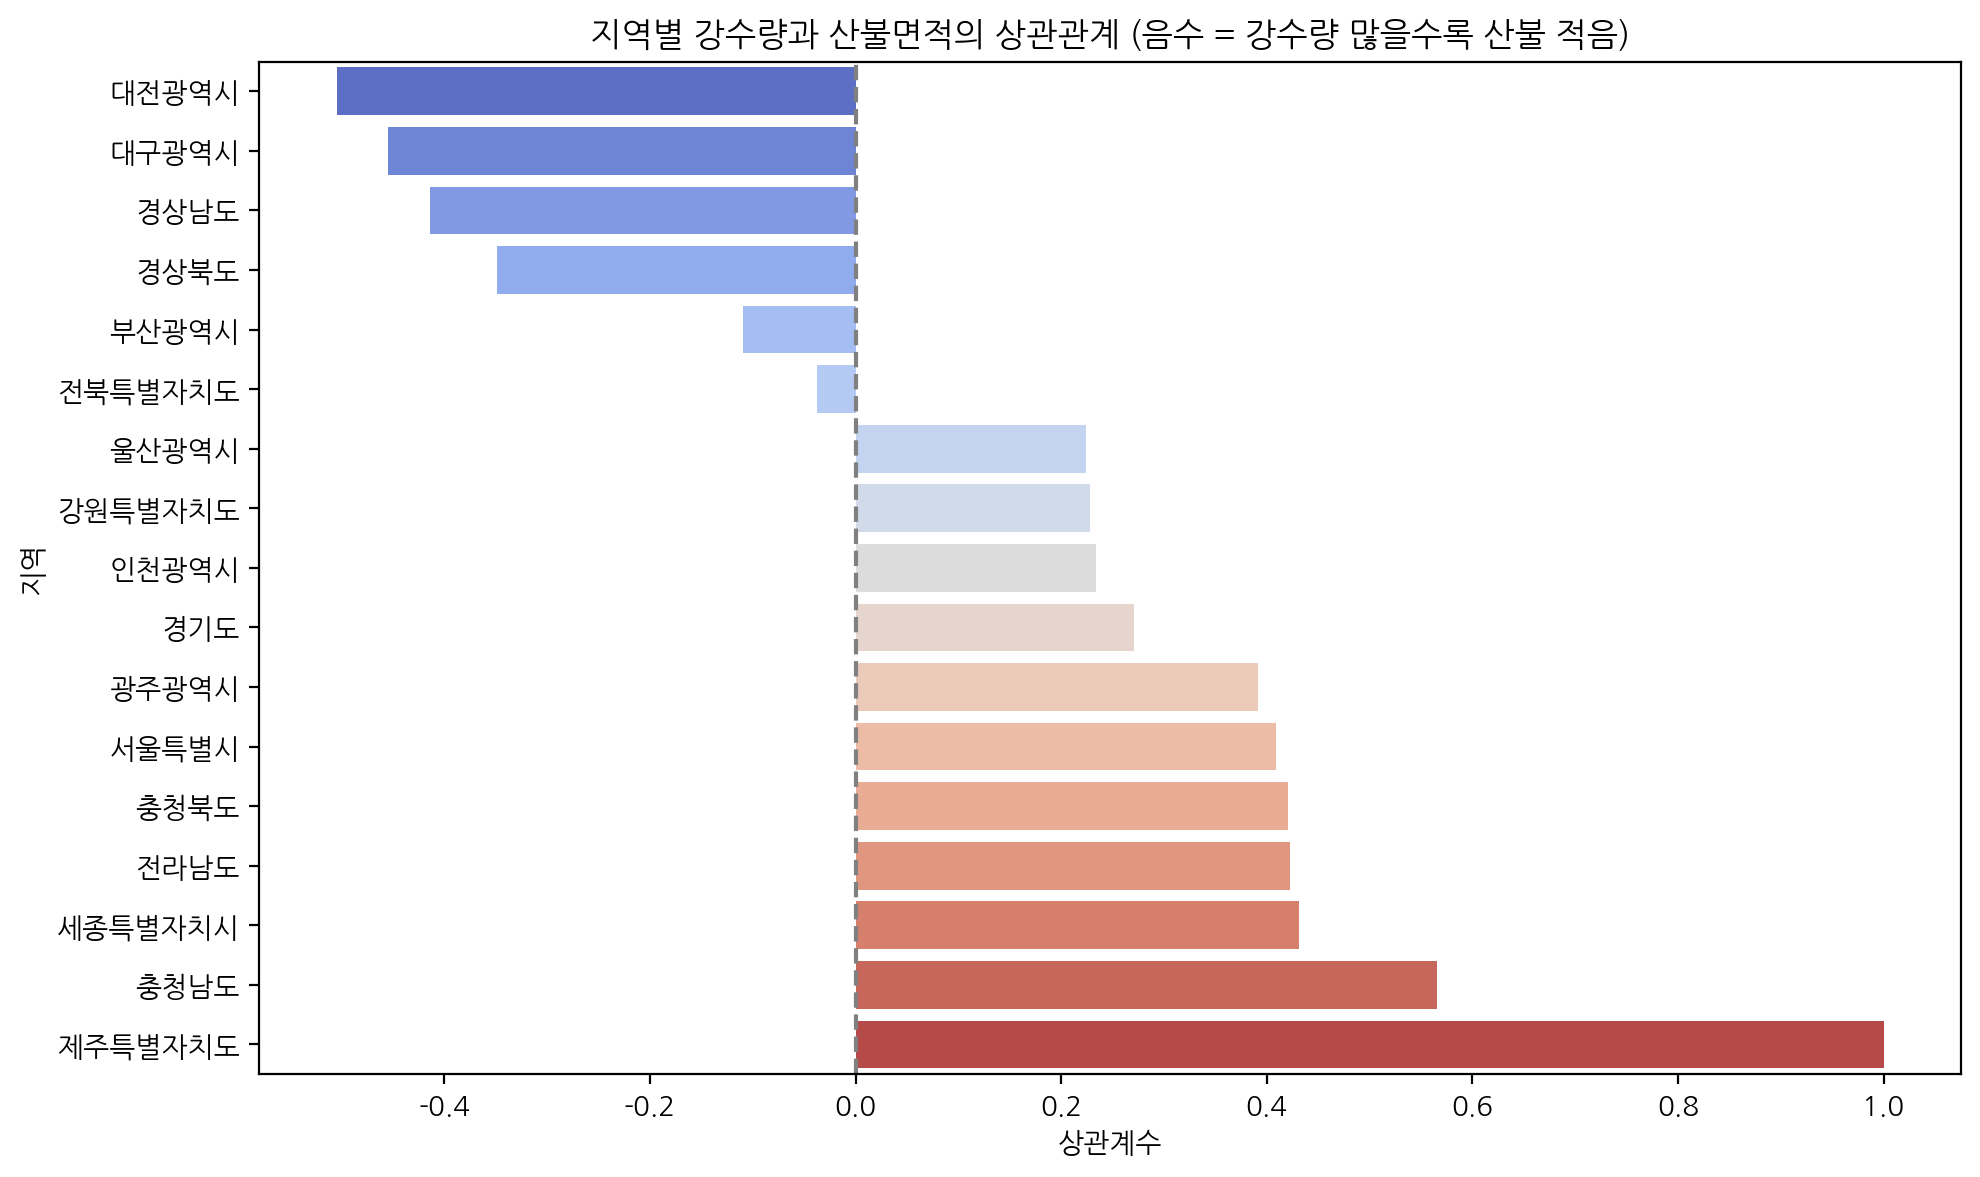

In [81]:
# 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df_sorted, x='상관계수', y='지역', palette='coolwarm', orient='h')
plt.title("지역별 강수량과 산불면적의 상관관계 (음수 = 강수량 많을수록 산불 적음)")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [82]:
# 결과 확인: 가장 음의 상관이 큰 지역
print("📌 강수량 많으면 산불이 적은 지역 Top 3:")
print(corr_df_sorted.head(3))

📌 강수량 많으면 산불이 적은 지역 Top 3:
      지역      상관계수
6  대전광역시 -0.504670
5  대구광역시 -0.455190
2   경상남도 -0.414204


In [93]:
# 음의 상관계수 Top 3 지역 추출
top3_regions = corr_df_sorted.head(3)['지역'].tolist()

In [95]:
# 각 지역에 대해 시각화
for 지역 in top3_regions:
    region_df = df[df['지역'] == 지역]

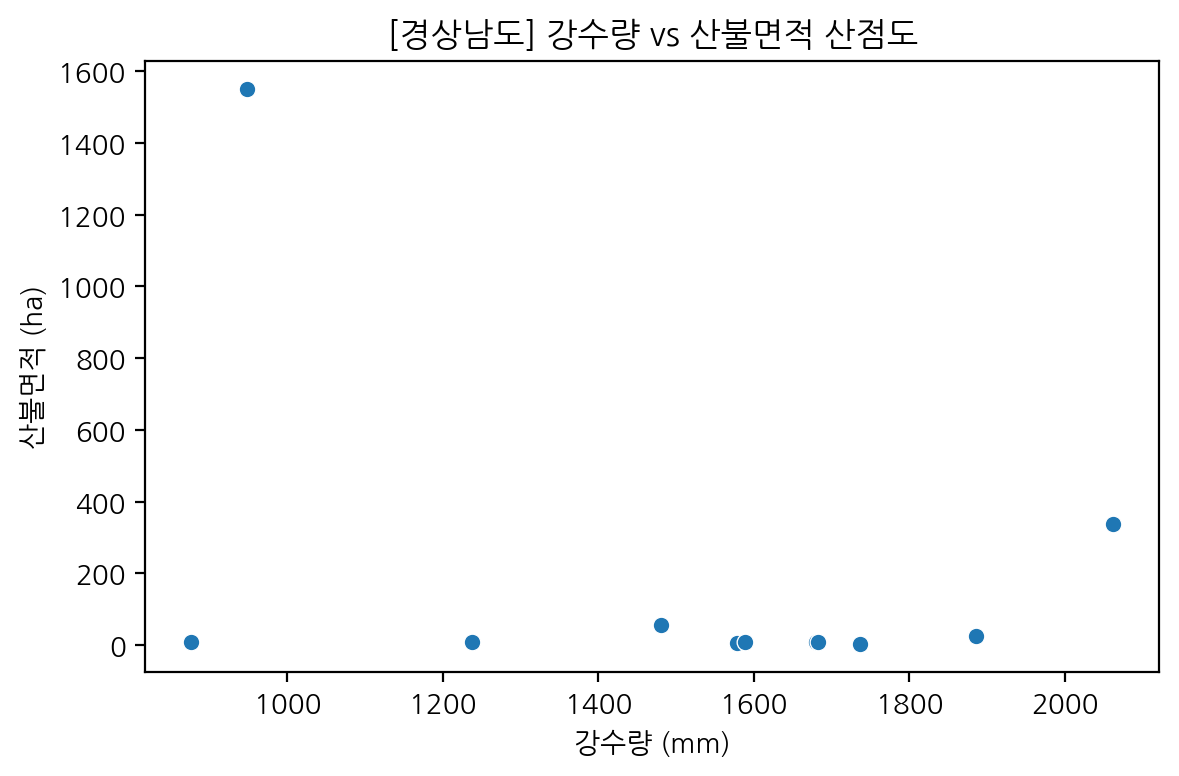

In [97]:
# 산점도
plt.figure(figsize=(6, 4))
sns.scatterplot(data=region_df, x='강수량', y='산불면적')
plt.title(f"[{지역}] 강수량 vs 산불면적 산점도")
plt.xlabel("강수량 (mm)")
plt.ylabel("산불면적 (ha)")
plt.tight_layout()
plt.show()

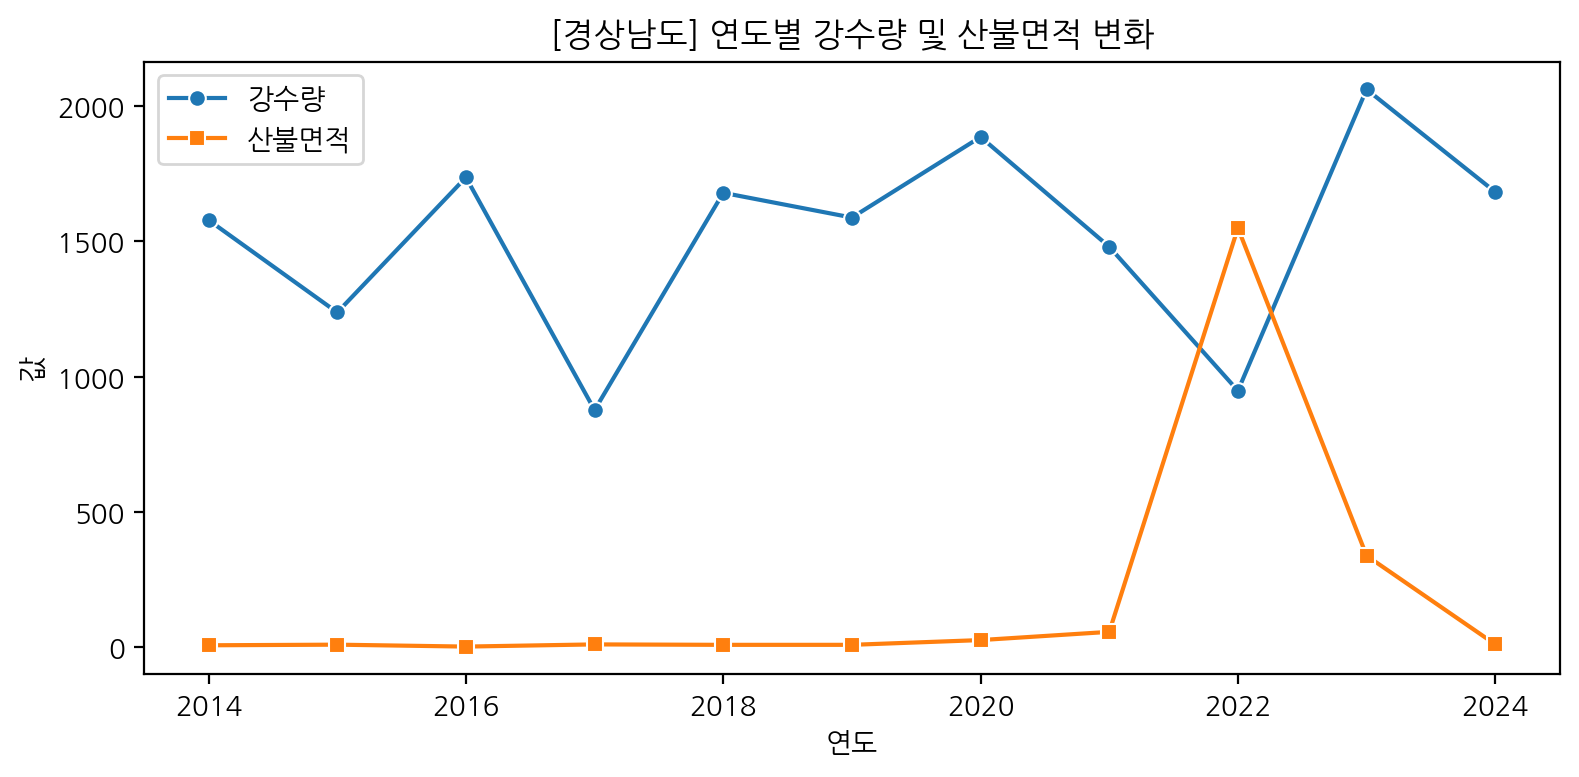

In [96]:
# 선그래프
plt.figure(figsize=(8, 4))
sns.lineplot(data=region_df, x='연도', y='강수량', label='강수량', marker='o')
sns.lineplot(data=region_df, x='연도', y='산불면적', label='산불면적', marker='s')
plt.title(f"[{지역}] 연도별 강수량 및 산불면적 변화")
plt.ylabel("값")
plt.legend()
plt.tight_layout()
plt.show()